In [1]:
# https://github.com/NielsRogge/Transformers-Tutorials/blob/master/ViTMAE/ViT_MAE_visualization_demo.ipynb

In [2]:
import os

os.chdir(os.path.join(os.getcwd(), '/home/mhill/Projects/cathepsin/')) # '.' if the path is to current folder
print(os.getcwd())




/home/mhill/Projects/cathepsin


In [3]:
import random
import numpy as np

import torch
from torch.utils.data import DataLoader

from transformers import ViTMAEConfig, ViTMAEForPreTraining

from src.plotters import plot_mae
from src.utils import select_device, extract_mae
from src.datasets import CustomDataset, collate_fn_valid_test

%reload_ext autoreload
%autoreload 2

device = select_device()

In [4]:
vitmaeconfig = {
  "attention_probs_dropout_prob": 0.0,
  "decoder_hidden_size": 192,
  "decoder_intermediate_size": 768,
  "decoder_num_attention_heads": 6,
  "decoder_num_hidden_layers": 6,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 192,
  "image_size": 64,
  "initializer_range": 0.02,
  "intermediate_size": 768,
  "layer_norm_eps": 1e-06,
  "mask_ratio": 0.75,
  "model_type": "vit_mae",
  "norm_pix_loss": 1,
  "num_attention_heads": 6,
  "num_channels": 16,
  "num_hidden_layers": 6,
  "patch_size": 2,
  "qkv_bias": True,
  "transformers_version": "4.41.2"

    # 'image_size': 64,
    # 'patch_size': 4,
    # 'num_channels': 16,
    # #
    # 'mask_ratio': 0.75,
    # 'norm_pix_loss': True,
    # #
    # 'hidden_size':192,
    # 'intermediate_size': 768,
    # 'num_hidden_layers': 12,
    # 'num_attention_heads': 12,
    # #
    # 'hidden_dropout_prob': 0.0,
    # 'attention_probs_dropout_prob': 0.0,
    # #
    # 'decoder_hidden_size': 192,
    # 'decoder_intermediate_size': 768,
    # 'decoder_num_hidden_layers': 12,
    # 'decoder_num_attention_heads': 12,
}

MODEL_PATH = "/home/mhill/Projects/cathepsin/logs/vitmae/14/model.pth"
checkpoint = torch.load(MODEL_PATH, map_location=device)

model = ViTMAEForPreTraining(config=ViTMAEConfig(**vitmaeconfig)).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [5]:
test_data = np.load("/home/mhill/Projects/cathepsin/data/testing_dataset.npy")
test_dataset = CustomDataset(test_data)

test_dataloader = DataLoader(
        test_dataset,
        batch_size=128,
        shuffle=True,
        collate_fn=collate_fn_valid_test
    )

In [6]:
patched_images = []
for batch in test_dataloader:
    patched_images.append(batch)
    
patched_images = torch.cat(patched_images)
random.shuffle(patched_images)
print(patched_images.shape)

dataset = CustomDataset(patched_images)

torch.Size([36864, 16, 64, 64])


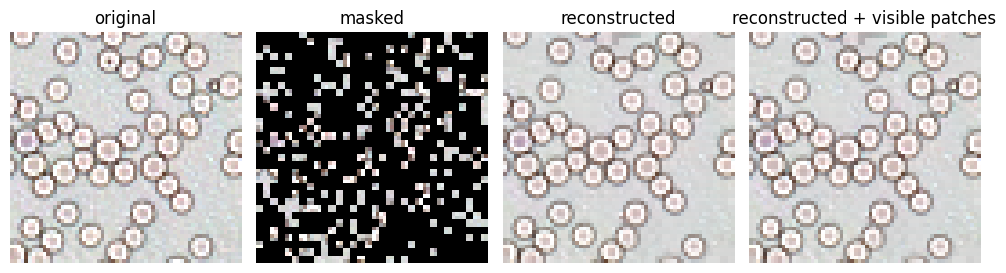

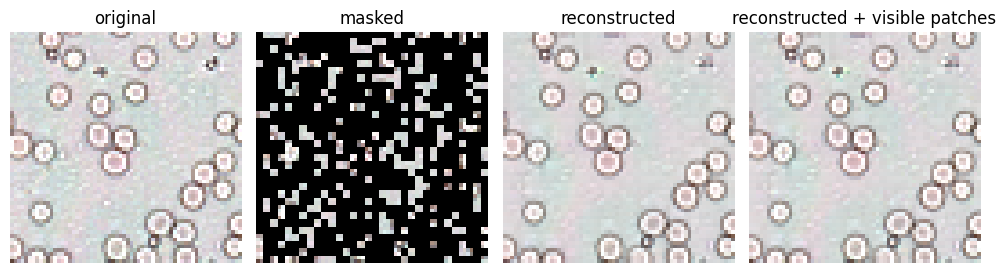

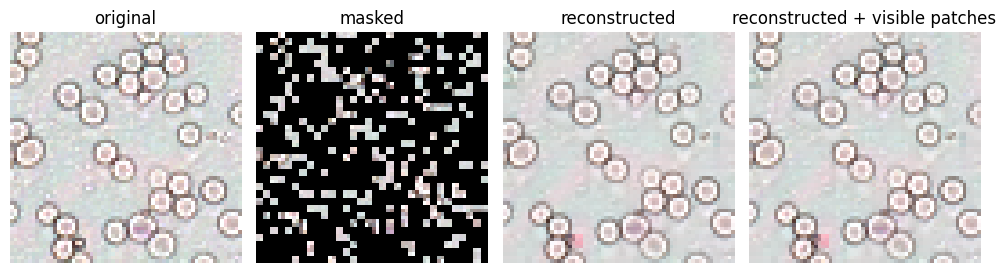

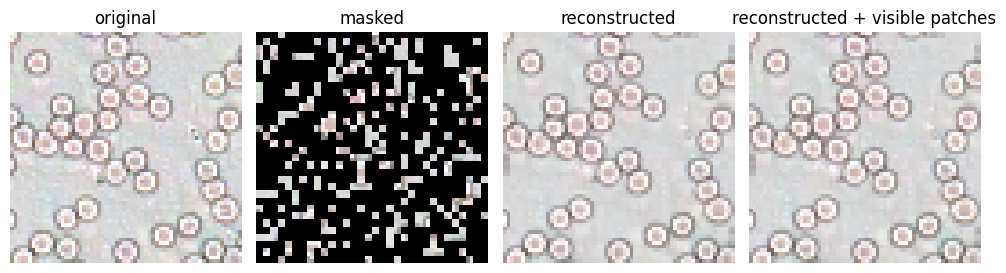

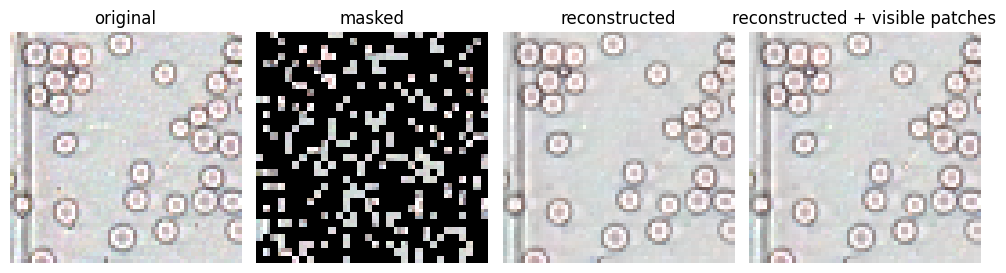

In [27]:
for i in range(5):
    image_index = random.randint(0, len(dataset) - 1)
    mae_image_results = extract_mae(model, dataset, image_index=image_index, device=device, denormalize=True)
    plot_mae(mae_image_results)